In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_se = pd.read_csv('resume_list_se.csv')

In [3]:
df_se.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"['Michael', 'F', 'Moskowitz', '914', 'www', 'l...","['michael', 'f', 'moskowitz', '914', 'www', 'l...","['michael', 'f', 'moskowitz', '914', 'www', 'l...","[('michael', 'NN'), ('f', 'VBP'), ('moskowitz'..."
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"['G', 'G', 'Niceville', 'FL', '850', 'adp547',...","['g', 'g', 'niceville', 'fl', '850', 'adp547',...","['g', 'g', 'niceville', 'fl', '850', 'adp547',...","[('g', 'NN'), ('g', 'NN'), ('niceville', 'JJ')..."
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"['HOLLY', 'MACALUSO', 'NJ', '7740', 'adp5ui', ...","['holly', 'macaluso', 'nj', '7740', 'adp5ui', ...","['holly', 'macaluso', 'nj', '7740', 'adp5ui', ...","[('holly', 'RB'), ('macaluso', 'CD'), ('nj', '..."
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"['Dianna', 'Chere', 'Lizardi', 'City', 'AL', '...","['dianna', 'chere', 'lizardi', 'city', 'al', '...","['dianna', 'chere', 'lizardi', 'city', 'al', '...","[('dianna', 'NN'), ('chere', 'JJ'), ('lizardi'..."
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"['adp5nx', '517', 'Howell', 'MI', '843', 'Skil...","['adp5nx', '517', 'howell', 'mi', '843', 'skil...","['adp5nx', '517', 'howell', 'mi', '843', 'skil...","[('adp5nx', 'RB'), ('517', 'CD'), ('howell', '..."


In [4]:
df_se["Category"] = "Sales Executive"
df_se.to_csv("resume_list_se.csv", index=False)

In [5]:
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_title          100 non-null    object
 1   resume             100 non-null    object
 2   Category           100 non-null    object
 3   cleaned_resume     100 non-null    object
 4   tokenized          100 non-null    object
 5   lowercase          100 non-null    object
 6   stopwords_removed  100 non-null    object
 7   pos_tags           100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


In [6]:
df_se.isnull().sum()

job_title            0
resume               0
Category             0
cleaned_resume       0
tokenized            0
lowercase            0
stopwords_removed    0
pos_tags             0
dtype: int64

In [7]:
print ("Displaying the distinct categories of resume:\n\n ")
print (df_se['job_title'].unique())

Displaying the distinct categories of resume:

 
['Sales Executive Business Development'
 'Sales Representative Account Executive' 'Sales Executive Account'
 'Customer Service Sales Executive' 'Sales Executive'
 'Sales Executive/ Sales Manager' 'Sales Representative Executive'
 'Mortgage Loan Sales Executive' 'Sales Executive Consultant'
 'Pharmaceutical Sales Executive' 'Sales Executive Kingston'
 'Coordinator Program Sales Executive' 'Sales Executive Et'
 'Account Executive Sales Director' 'Prudential Insurance Sales Executive'
 'Sales Executive Sunnyvale' 'Executive sales'
 'Terminal Manager Sales Executive'
 'Experienced Account Executive with strong Sales background'
 'Sales Executive Outside' 'Production Coordinator Sales Executive'
 'Sales Executive Parts Manager' 'Sales Executive Greater'
 'Sales Executive Manager' 'Sales Representative Executive Chef'
 'Sales Executive Customer Service' 'Call Boy Sales Executive'
 'Sales Executive Port' 'Regional Account Sales Executive'
 'Sal

In [8]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (df_se['job_title'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Sales Executive                     9
Sales Representative Executive      4
Sales Executive Manager             4
Sales Executive Account             3
Customer Service Sales Executive    2
                                   ..
Executive Assistant Sales           1
Sales Manager Executive             1
Sales Executive Cleaner             1
Director Of Sales Executive         1
York University Sales Executive     1
Name: job_title, Length: 80, dtype: int64


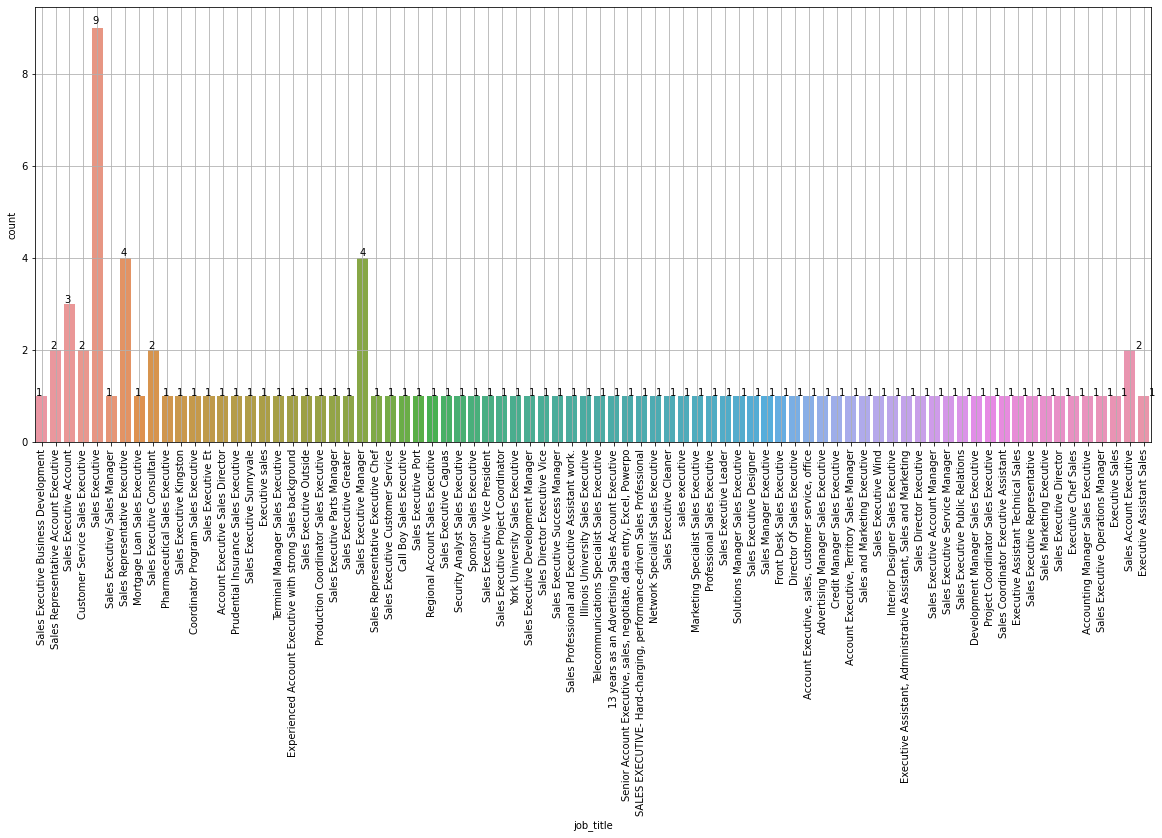

In [9]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax=sns.countplot(x="job_title", data=df_se)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()


In [10]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (df_se['job_title'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Sales Executive                     9
Sales Representative Executive      4
Sales Executive Manager             4
Sales Executive Account             3
Customer Service Sales Executive    2
                                   ..
Executive Assistant Sales           1
Sales Manager Executive             1
Sales Executive Cleaner             1
Director Of Sales Executive         1
York University Sales Executive     1
Name: job_title, Length: 80, dtype: int64


In [11]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df_se['cleaned_resume'] = df_se.resume.apply(lambda x: cleanResume(x))

In [12]:
df_se.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"['Michael', 'F', 'Moskowitz', '914', 'www', 'l...","['michael', 'f', 'moskowitz', '914', 'www', 'l...","['michael', 'f', 'moskowitz', '914', 'www', 'l...","[('michael', 'NN'), ('f', 'VBP'), ('moskowitz'..."
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"['G', 'G', 'Niceville', 'FL', '850', 'adp547',...","['g', 'g', 'niceville', 'fl', '850', 'adp547',...","['g', 'g', 'niceville', 'fl', '850', 'adp547',...","[('g', 'NN'), ('g', 'NN'), ('niceville', 'JJ')..."
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"['HOLLY', 'MACALUSO', 'NJ', '7740', 'adp5ui', ...","['holly', 'macaluso', 'nj', '7740', 'adp5ui', ...","['holly', 'macaluso', 'nj', '7740', 'adp5ui', ...","[('holly', 'RB'), ('macaluso', 'CD'), ('nj', '..."
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"['Dianna', 'Chere', 'Lizardi', 'City', 'AL', '...","['dianna', 'chere', 'lizardi', 'city', 'al', '...","['dianna', 'chere', 'lizardi', 'city', 'al', '...","[('dianna', 'NN'), ('chere', 'JJ'), ('lizardi'..."
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"['adp5nx', '517', 'Howell', 'MI', '843', 'Skil...","['adp5nx', '517', 'howell', 'mi', '843', 'skil...","['adp5nx', '517', 'howell', 'mi', '843', 'skil...","[('adp5nx', 'RB'), ('517', 'CD'), ('howell', '..."


In [13]:
import nltk
import string
from nltk.tokenize import word_tokenize

In [14]:
df_se['tokenized'] = df_se['cleaned_resume'].apply(word_tokenize)
df_se.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"[Michael, F, Moskowitz, 914, www, linkedin, co...","['michael', 'f', 'moskowitz', '914', 'www', 'l...","['michael', 'f', 'moskowitz', '914', 'www', 'l...","[('michael', 'NN'), ('f', 'VBP'), ('moskowitz'..."
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"[G, G, Niceville, FL, 850, adp547, Professiona...","['g', 'g', 'niceville', 'fl', '850', 'adp547',...","['g', 'g', 'niceville', 'fl', '850', 'adp547',...","[('g', 'NN'), ('g', 'NN'), ('niceville', 'JJ')..."
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"[HOLLY, MACALUSO, NJ, 7740, adp5ui, 908, Asser...","['holly', 'macaluso', 'nj', '7740', 'adp5ui', ...","['holly', 'macaluso', 'nj', '7740', 'adp5ui', ...","[('holly', 'RB'), ('macaluso', 'CD'), ('nj', '..."
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"[Dianna, Chere, Lizardi, City, AL, 36869, 706,...","['dianna', 'chere', 'lizardi', 'city', 'al', '...","['dianna', 'chere', 'lizardi', 'city', 'al', '...","[('dianna', 'NN'), ('chere', 'JJ'), ('lizardi'..."
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"[adp5nx, 517, Howell, MI, 843, Skills, Prospec...","['adp5nx', '517', 'howell', 'mi', '843', 'skil...","['adp5nx', '517', 'howell', 'mi', '843', 'skil...","[('adp5nx', 'RB'), ('517', 'CD'), ('howell', '..."


In [15]:
df_se['lowercase'] = df_se['tokenized'].apply(lambda x: [word.lower() for word in x])
df_se.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"[Michael, F, Moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","['michael', 'f', 'moskowitz', '914', 'www', 'l...","[('michael', 'NN'), ('f', 'VBP'), ('moskowitz'..."
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"[G, G, Niceville, FL, 850, adp547, Professiona...","[g, g, niceville, fl, 850, adp547, professiona...","['g', 'g', 'niceville', 'fl', '850', 'adp547',...","[('g', 'NN'), ('g', 'NN'), ('niceville', 'JJ')..."
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"[HOLLY, MACALUSO, NJ, 7740, adp5ui, 908, Asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","['holly', 'macaluso', 'nj', '7740', 'adp5ui', ...","[('holly', 'RB'), ('macaluso', 'CD'), ('nj', '..."
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"[Dianna, Chere, Lizardi, City, AL, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","['dianna', 'chere', 'lizardi', 'city', 'al', '...","[('dianna', 'NN'), ('chere', 'JJ'), ('lizardi'..."
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"[adp5nx, 517, Howell, MI, 843, Skills, Prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","['adp5nx', '517', 'howell', 'mi', '843', 'skil...","[('adp5nx', 'RB'), ('517', 'CD'), ('howell', '..."


In [16]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [17]:
stop_words = set(stopwords.words('english'))
df_se['stopwords_removed'] = df_se['lowercase'].apply(lambda x: [word for word in x if word not in stop_words])
df_se.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"[Michael, F, Moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[('michael', 'NN'), ('f', 'VBP'), ('moskowitz'..."
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"[G, G, Niceville, FL, 850, adp547, Professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[('g', 'NN'), ('g', 'NN'), ('niceville', 'JJ')..."
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"[HOLLY, MACALUSO, NJ, 7740, adp5ui, 908, Asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[('holly', 'RB'), ('macaluso', 'CD'), ('nj', '..."
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"[Dianna, Chere, Lizardi, City, AL, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[('dianna', 'NN'), ('chere', 'JJ'), ('lizardi'..."
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"[adp5nx, 517, Howell, MI, 843, Skills, Prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[('adp5nx', 'RB'), ('517', 'CD'), ('howell', '..."


In [18]:
df_se['pos_tags'] = df_se['stopwords_removed'].apply(nltk.tag.pos_tag)
df_se.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"[Michael, F, Moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[(michael, NN), (f, VBP), (moskowitz, $), (914..."
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"[G, G, Niceville, FL, 850, adp547, Professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[(g, NN), (g, NN), (niceville, JJ), (fl, NN), ..."
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"[HOLLY, MACALUSO, NJ, 7740, adp5ui, 908, Asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[(holly, RB), (macaluso, CD), (nj, JJ), (7740,..."
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"[Dianna, Chere, Lizardi, City, AL, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[(dianna, NN), (chere, JJ), (lizardi, JJ), (ci..."
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"[adp5nx, 517, Howell, MI, 843, Skills, Prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[(adp5nx, RB), (517, CD), (howell, NN), (mi, N..."


In [19]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df_se['wordnet_pos'] = df_se['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_se.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"[Michael, F, Moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[(michael, NN), (f, VBP), (moskowitz, $), (914...","[(michael, n), (f, v), (moskowitz, n), (914, n..."
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"[G, G, Niceville, FL, 850, adp547, Professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[(g, NN), (g, NN), (niceville, JJ), (fl, NN), ...","[(g, n), (g, n), (niceville, a), (fl, n), (850..."
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"[HOLLY, MACALUSO, NJ, 7740, adp5ui, 908, Asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[(holly, RB), (macaluso, CD), (nj, JJ), (7740,...","[(holly, r), (macaluso, n), (nj, a), (7740, n)..."
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"[Dianna, Chere, Lizardi, City, AL, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[(dianna, NN), (chere, JJ), (lizardi, JJ), (ci...","[(dianna, n), (chere, a), (lizardi, a), (city,..."
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"[adp5nx, 517, Howell, MI, 843, Skills, Prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[(adp5nx, RB), (517, CD), (howell, NN), (mi, N...","[(adp5nx, r), (517, n), (howell, n), (mi, n), ..."


In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
wnl = WordNetLemmatizer()
df_se['lemmatized'] = df_se['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_se.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"[Michael, F, Moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[(michael, NN), (f, VBP), (moskowitz, $), (914...","[(michael, n), (f, v), (moskowitz, n), (914, n...","[michael, f, moskowitz, 914, www, linkedin, co..."
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"[G, G, Niceville, FL, 850, adp547, Professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[(g, NN), (g, NN), (niceville, JJ), (fl, NN), ...","[(g, n), (g, n), (niceville, a), (fl, n), (850...","[g, g, niceville, fl, 850, adp547, professiona..."
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"[HOLLY, MACALUSO, NJ, 7740, adp5ui, 908, Asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[(holly, RB), (macaluso, CD), (nj, JJ), (7740,...","[(holly, r), (macaluso, n), (nj, a), (7740, n)...","[holly, macaluso, nj, 7740, adp5ui, 908, asser..."
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"[Dianna, Chere, Lizardi, City, AL, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[(dianna, NN), (chere, JJ), (lizardi, JJ), (ci...","[(dianna, n), (chere, a), (lizardi, a), (city,...","[dianna, chere, lizardi, city, al, 36869, 706,..."
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"[adp5nx, 517, Howell, MI, 843, Skills, Prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[(adp5nx, RB), (517, CD), (howell, NN), (mi, N...","[(adp5nx, r), (517, n), (howell, n), (mi, n), ...","[adp5nx, 517, howell, mi, 843, skill, prospect..."


In [22]:
pip install docx2txt

Note: you may need to restart the kernel to use updated packages.


In [23]:
import docx2txt

In [24]:
job_desc = docx2txt.process("job_descp_se.docx")
print(job_desc)

A sales executive is responsible for helping build up a business by identifying new business prospects and selling product to them. They must maintain relationships with current clients and build and maintain relationships with new clients. They will also need to stay ahead of their competition and work on sharpening and improving their skills by attending classes, seminars or workshops.



To work as a sales executive, it is recommended that you hold at least a bachelor's degree in Sales and Marketing. Some employees will even prefer to hire someone with a master's degree. Experience in sales and marketing is a huge plus. You must understand the sales and marketing processes and be able to negotiate with clients. You must be able to search out business leads and trending products. Communication skills are also vital to this job.


In [25]:
df_se['cleaned_resume'][0]

' Michael F Moskowitz 914 www linkedin com in michaelfmoskowitz adp7e4 PROFESSIONAL PROFILE Dynamic sales marketing public relations and a ount management leader with a background in building strategic relationships in high net worth markets Strong ability to create and execute growth and profitability in a fast paced result driven environment Skilled in leading client focused courteous and professional teams QUALIFICATIONS and SKILLS Develops and executes sales and marketing strategies Strategic problem solver Relationship builder Large a ount management Coached and trained staff of 80 Skilled communicator Manages budget and expenditures Board presentations Strong negotiator EXPERIENCE Director of Sales and Business Development 2012 2020 Bermuda Limousine International New York Providers of Chauffeured ground transportation for International and national corporate clients Achievements Expanded client base resulting in a 20 market share growth and increased revenue by 25 Developed and 

In [26]:
text = [df_se['cleaned_resume'][99],job_desc]

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(text)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(count_matrix))

[[1.         0.58937774]
 [0.58937774 1.        ]]


In [29]:
match = cosine_similarity(count_matrix)[0][1]
match = match*100
match = round(match,2)
match = match+30
print(match)

88.94


In [31]:
def fit_check(text_df):
    text = [text_df,job_desc]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+20
    return match

df_se['Right_fit_Score'] = df_se.cleaned_resume.apply(lambda x: fit_check(x))

    
    

In [32]:
df_se.head(100)

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"[Michael, F, Moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[(michael, NN), (f, VBP), (moskowitz, $), (914...","[(michael, n), (f, v), (moskowitz, n), (914, n...","[michael, f, moskowitz, 914, www, linkedin, co...",80.69
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"[G, G, Niceville, FL, 850, adp547, Professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[(g, NN), (g, NN), (niceville, JJ), (fl, NN), ...","[(g, n), (g, n), (niceville, a), (fl, n), (850...","[g, g, niceville, fl, 850, adp547, professiona...",89.83
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"[HOLLY, MACALUSO, NJ, 7740, adp5ui, 908, Asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[(holly, RB), (macaluso, CD), (nj, JJ), (7740,...","[(holly, r), (macaluso, n), (nj, a), (7740, n)...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...",67.86
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"[Dianna, Chere, Lizardi, City, AL, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[(dianna, NN), (chere, JJ), (lizardi, JJ), (ci...","[(dianna, n), (chere, a), (lizardi, a), (city,...","[dianna, chere, lizardi, city, al, 36869, 706,...",73.63
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"[adp5nx, 517, Howell, MI, 843, Skills, Prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[(adp5nx, RB), (517, CD), (howell, NN), (mi, N...","[(adp5nx, r), (517, n), (howell, n), (mi, n), ...","[adp5nx, 517, howell, mi, 843, skill, prospect...",75.61
...,...,...,...,...,...,...,...,...,...,...,...
95,Sales Executive,\r\nPersonal Data:\r\n\r\nName: Waqqas Tanvir\...,Sales Executive,Personal Data Name Waqqas Tanvir Nationality ...,"[Personal, Data, Name, Waqqas, Tanvir, Nationa...","[personal, data, name, waqqas, tanvir, nationa...","[personal, data, name, waqqas, tanvir, nationa...","[(personal, JJ), (data, NNS), (name, NN), (waq...","[(personal, a), (data, n), (name, n), (waqqas,...","[personal, data, name, waqqas, tanvir, nationa...",84.23
96,Executive Assistant Sales,"\r\nMARCO HENRIQUES\r\nMiami, Fl ***** · 856-*...",Sales Executive,MARCO HENRIQUES Miami Fl 856 adlv44 www linke...,"[MARCO, HENRIQUES, Miami, Fl, 856, adlv44, www...","[marco, henriques, miami, fl, 856, adlv44, www...","[marco, henriques, miami, fl, 856, adlv44, www...","[(marco, NN), (henriques, NNS), (miami, VBP), ...","[(marco, n), (henriques, n), (miami, v), (fl, ...","[marco, henriques, miami, fl, 856, adlv44, www...",82.28
97,Sales Executive,\r\nJack S Doran II\r\n916-***-****\r\nadlu7w@...,Sales Executive,Jack S Doran II 916 adlu7w SUMMARY Senior Man...,"[Jack, S, Doran, II, 916, adlu7w, SUMMARY, Sen...","[jack, s, doran, ii, 916, adlu7w, summary, sen...","[jack, doran, ii, 916, adlu7w, summary, senior...","[(jack, NN), (doran, NN), (ii, NN), (916, CD),...","[(jack, n), (doran, n), (ii, n), (916, n), (ad...","[jack, doran, ii, 916, adlu7w, summary, senior...",77.16
98,Sales Account Executive,\r\nMC\r\n\r\nMILTON CRUTCHFIELD\r\n\r\n972-**...,Sales Executive,MC MILTON CRUTCHFIELD 972 adlt61 Me

In [33]:
df_se['Right_fit_Score'].max()

93.23

In [34]:
skill = docx2txt.process("skill_se.docx")
print(skill)

Self-motivated and driven by targets.

Resilience.

Strong communication skills – including both verbal and written.

The ability to influence and negotiate with others.

Commercial awareness.

IT skills.

Numerical skills.

Confidence - maintaining a positive attitude.

Resilience - communicating with conviction.

Active listening - understanding the customers' needs.

Rapport building - selling your personality.

Entrepreneurial spirit - continual self-improvement.


In [37]:
def skill_check(text_df):
    text = [text_df,skill]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+40
    return match

df_se['skill_fit_Score'] = df_se.cleaned_resume.apply(lambda x: skill_check(x))

    
df_se.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score,skill_fit_Score
0,Sales Executive Business Development,\r\nMichael F. Moskowitz\r\n914-***-****\r\nww...,Sales Executive,Michael F Moskowitz 914 www linkedin com in m...,"[Michael, F, Moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[michael, f, moskowitz, 914, www, linkedin, co...","[(michael, NN), (f, VBP), (moskowitz, $), (914...","[(michael, n), (f, v), (moskowitz, n), (914, n...","[michael, f, moskowitz, 914, www, linkedin, co...",80.69,75.77
1,Sales Representative Account Executive,"\r\nGџђє GџіѠюњќџђ\r\nNiceville, FL ***** • 85...",Sales Executive,G G Niceville FL 850 adp547 Professional Summ...,"[G, G, Niceville, FL, 850, adp547, Professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[g, g, niceville, fl, 850, adp547, professiona...","[(g, NN), (g, NN), (niceville, JJ), (fl, NN), ...","[(g, n), (g, n), (niceville, a), (fl, n), (850...","[g, g, niceville, fl, 850, adp547, professiona...",89.83,73.28
2,Sales Executive Account,"\r\nHOLLY MACALUSO\r\n*** ***** *****, **** **...",Sales Executive,HOLLY MACALUSO NJ 7740 adp5ui 908 Assertive e...,"[HOLLY, MACALUSO, NJ, 7740, adp5ui, 908, Asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...","[(holly, RB), (macaluso, CD), (nj, JJ), (7740,...","[(holly, r), (macaluso, n), (nj, a), (7740, n)...","[holly, macaluso, nj, 7740, adp5ui, 908, asser...",67.86,63.41
3,Customer Service Sales Executive,\r\nDianna Chere’ Lizardi\r\n*** *** **** *** ...,Sales Executive,Dianna Chere Lizardi City AL 36869 706 adp5tv...,"[Dianna, Chere, Lizardi, City, AL, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[dianna, chere, lizardi, city, al, 36869, 706,...","[(dianna, NN), (chere, JJ), (lizardi, JJ), (ci...","[(dianna, n), (chere, a), (lizardi, a), (city,...","[dianna, chere, lizardi, city, al, 36869, 706,...",73.63,74.46
4,Sales Executive,\r\nadp5nx@r.postjobfree.com\r\n517-***-****\r...,Sales Executive,adp5nx 517 Howell MI 843 Skills Prospecting S...,"[adp5nx, 517, Howell, MI, 843, Skills, Prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[adp5nx, 517, howell, mi, 843, skills, prospec...","[(adp5nx, RB), (517, CD), (howell, NN), (mi, N...","[(adp5nx, r), (517, n), (howell, n), (mi, n), ...","[adp5nx, 517, howell, mi, 843, skill, prospect...",75.61,72.65


In [38]:
df_se['skill_fit_Score'].max()

81.88